REEMBOLSOS DOS PARLAMENTARES DA BAHIA
======================================

Este repositório possui os reembolsos de todos os deputados federais da Bahia de todos os partidos durante os anos de 2009 a 2017.

Os dados foram disponibilizados pela **OPERAÇÃO SERENATA DE AMOR**.

O que você verá
-----------------



In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# Importing the dataset
dataset = pd.read_csv('TodosReembolsosBahia.csv', encoding='latin1')
print(len(dataset)) #118796 linhas

118796


/Users/lucasrcsantana/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Ano,CódigoCandidato,CódigoDocumento,ValorTotalLiquido,CódigoReembolso,NomeParlamentar,DocumentoDoParlamentar,DocumentoParlamentar,Mandato,Estado,...,TipoDocumento,DataEmissão,ValorDocumento,ValorRemarcado,ValorLíquidoReembolso,Mês,Parcelado,Passageiro,PercursoViagem,NúmeroLote
0,2009,1063,1570103,800.0,2894,JOÃO LEÃO,74550.0,199.0,2011.0,BA,...,1,"Mar 6, 2009",800.0,0.0,800.0,3,0,NaN,NaN,390844
1,2009,1063,1570107,430.0,2894,JOÃO LEÃO,74550.0,199.0,2011.0,BA,...,1,"Mar 6, 2009",430.0,0.0,430.0,3,0,NaN,NaN,390844
2,2009,1063,1570118,4195.0,2894,JOÃO LEÃO,74550.0,199.0,2011.0,BA,...,0,"Apr 13, 2009",4195.0,0.0,4195.0,4,0,NaN,NaN,390853
3,2009,1063,1570121,3970.0,2894,JOÃO LEÃO,74550.0,199.0,2011.0,BA,...,0,"Apr 13, 2009",3970.0,0.0,3970.0,4,0,NaN,NaN,390852
4,2009,1063,1583550,800.0,2912,JOÃO LEÃO,74550.0,199.0,2011.0,BA,...,1,"Apr 8, 2009",800.0,0.0,800.0,4,0,NaN,NaN,395314


In [202]:
#RETIRANDO COlUNAS JULGADAS DESNECESSÁRIAS
dataset = dataset.drop('NúmeroDocumento',axis = 1)
dataset = dataset.drop('cnpj_cpf',axis = 1)
dataset = dataset.drop('CódigoMandato',axis = 1)
dataset = dataset.drop('CódigoDocumento',axis = 1)
dataset = dataset.drop('CódigoReembolso',axis = 1)
dataset = dataset.drop('DocumentoDoParlamentar',axis = 1)
dataset = dataset.drop('DocumentoParlamentar',axis = 1)
dataset = dataset.drop('CódigoCandidato',axis = 1)
dataset = dataset.drop('NúmeroLote',axis = 1)

ValueError: labels ['NúmeroDocumento'] not contained in axis

In [201]:
#CATEGORIZANDO AS COLUNAS QUE SERVIRÃO DE VARIÁVEIS INDEPENDENTES PARA OS GRÁFICOS
dataset.Ano = dataset.Ano.astype('category')
dataset.NomeParlamentar = dataset.NomeParlamentar.astype('category')
dataset.Fornecedor = dataset.Fornecedor.astype('category')
dataset.Mandato = dataset.Mandato.astype('category')
dataset.NúmeroSubquota = dataset.NúmeroSubquota.astype('category')
dataset.DescriçãoSubquota = dataset.DescriçãoSubquota.astype('category')
dataset.DescriçãoGrupoSubquota = dataset.DescriçãoGrupoSubquota.astype('category')
dataset.Estado = dataset.Estado.astype('category')
dataset.Partido = dataset.Partido.astype('category')
dataset.CódigoSubquota = dataset.CódigoSubquota.astype('category')
dataset.TipoDocumento = dataset.TipoDocumento.astype('category')
dataset.Mês = dataset.Mês.astype('category')
dataset.Passageiro = dataset.Passageiro.astype('category')
dataset.PercursoViagem = dataset.PercursoViagem.astype('category')

In [6]:
#FAZENDO LISTAS E DICIONÁRIOS QUE PODEM SER NECESSÁRIOS DEPOIS
Anos = list(dataset.Ano.cat.categories)
Partidos = list(dataset.Partido.cat.categories)
Parlamentares = list(dataset.NomeParlamentar.cat.categories)
PartidoDict = {'DEM': 1, 'PCdoB': 2, 'PDT': 3, 'PEN': 4, 'PHS': 5, 'PMDB': 6, 'PP': 7, 'PPS': 8, 'PR': 9, 'PRB': 10, 'PROS': 11, 'PRP': 12, 'PSB': 13, 'PSC': 14, 'PSD': 15, 'PSDB': 16, 'PT': 17, 'PTB': 18, 'PTN': 19, 'PV': 20, 'SD': 21}
AnoDict = {'2009': 1 , '2010': 2 , '2011': 3, '2012': 4, '2013': 5, '2014': 6, '2015':7 , '2016': 8, '2017': 9}

Os maiores valores de reembolsos únicos foram os seguintes
---
A função MaioresReembolsos retorna as informações e/ou planilhas dos maiores reembolsos realizados
É possível chamar a função da seguinte maneira: 
**MaioresReembolsos(reembolsos = 50, texto = False, planilha = True)**

In [63]:
#RETORNA OS MAIORES REEMBOLSOS
#FUNÇÃO PARA RETORNAR OS MAIORES REEMBOLSOS
# MaioresReembolsos(reembolsos = 50, texto = False, planilha = True)

def MaioresReembolsos(reembolsos = 50, texto = False, planilha = True):
    for posicao in range(reembolsos):
        maiorReembolso = dataset.sort_values(by='ValorLíquidoReembolso', ascending=False).head(reembolsos).iloc[posicao]
        if texto == True:
            print("O {}˚ maior reembolso foi realizado para {} do {} em {} no valor de R$ {} com a descrição de {} no dia {} ao fornecedor {} \n".format(posicao +1, maiorReembolso['NomeParlamentar'], maiorReembolso['Partido'], maiorReembolso['Ano'], maiorReembolso['ValorLíquidoReembolso'], maiorReembolso['DescriçãoSubquota'], maiorReembolso['DataEmissão'], maiorReembolso['Fornecedor']))
        
    if planilha == True: return dataset.sort_values(by='ValorLíquidoReembolso', ascending=False).head(reembolsos)
    
MaioresReembolsos()

,Ano,ValorTotalLiquido,NomeParlamentar,Mandato,Estado,Partido,NúmeroSubquota,DescriçãoSubquota,CódigoSubquota,DescriçãoGrupoSubquota,Fornecedor,TipoDocumento,DataEmissão,ValorDocumento,ValorRemarcado,ValorLíquidoReembolso,Mês,Parcelado,Passageiro,PercursoViagem
82971,2014,140000.0,FÉLIX MENDONÇA JÚNIOR,2015.0,BA,PDT,5,Publicity of parliamentary activity,0,NaN,CONTRASTE EDITORA E INDUSTRIA GRAFICA,0,"Nov 14, 2014",140000.0,0.00,140000.0,11,0,NaN,NaN
21905,2010,114931.0,FERNANDO DE FABINHO,2007.0,BA,DEM,5,Publicity of parliamentary activity,0,NaN,REGRAF COMÉRCIO E SERVIÇOS GRAFICOS LTDA,0,"Nov 4, 2010",120175.0,5244.21,114931.0,11,0,NaN,NaN
94330,2015,100000.0,FÉLIX MENDONÇA JÚNIOR,2015.0,BA,PDT,5,Publicity of parliamentary activity,0,NaN,CONTRASTE EDITORA E INDUSTRIA GRAFICA,0,"Nov 27, 2015",100000.0,0.00,100000.0,11,0,NaN,NaN
109028,2016,95000.0,FÉLIX MENDONÇA JÚNIOR,2015.0,BA,PDT,5,Publicity of parliamentary activity,0,NaN,CONTRASTE EDITORA E INDUSTRIA GRAFICA,0,"Nov 21, 2016",95000.0,0.00,95000.0,11,0,NaN,NaN
83430,2014,92266.0,FERNANDO TORRES,2015.0,BA,PSD,5,Publicity of parliamentary activity,0,NaN,MARIANO E ESQUIVEL LTDA,0,"Dec 30, 2014",92266.0,0.00,92266.0,12,0,NaN,NaN
108873,2016,90000.0,FÉLIX MENDONÇA JÚNIOR,2015.0,BA,PDT,5,Publicity of parliamentary activity,0,NaN,CONTRASTE EDITORA E INDUSTRIA GRAFICA,0,"May 25, 2016",90000.0,0.00,90000.0,5,0,NaN,NaN
95240,2015,80300.0,LUCIO VIEIRA LIMA,2015.0,BA,PMDB,5,Publicity of parliamentary activity,0,NaN,BG GRAFICA E EDITORIAL LTDA,0,"Dec 21, 2015",80300.0,0.00,80300.0,12,0,NaN,NaN
85838,2014,74800.0,LUCIO VIEIRA LIMA,2015.0,BA,PMDB,5,Publicity of parliamentary activity,0,NaN,BG GRAFICA E EDITORIAL LTDA,0,"Dec 10, 2014",74800.0,0.00,74800.0,12,0,NaN,NaN
94185,2015,74000.0,FÉLIX MENDONÇA JÚNIOR,2015.0,BA,PDT,5,Publicity of parliamentary activity,0,NaN,CONTRASTE EDITORA E INDUSTRIA GRAFICA,0,"Jun 15, 2015",74000.0,0.00,74000.0,6,0,NaN,NaN
80308,2014,70400.0,ROBERTO BRITTO,2015.0,BA,PP,5,Publicity of parliamentary activity,0,NaN,M.A DA SILVA MACEDO,0,"Dec 5, 2014",80000.0,9600.00,70400.0,12,0,NaN,NaN


FUNÇÕES PARA GERAÇÃO DE PLANILHAS E GRÁFICOS
-----

Com as funções InspecaoPorParlamentar e InspecaoPorColuna é possível rapidamante gerar gráficos de planilhas das informações relevantes, filtradas e somadas.

As chamadas são:
1. **SomaPorParlamentar( nome='ALICE PORTUGAL', feature ='DescriçãoSubquota', grafico = True, planilha = True)**
2. **SomaPorColuna( coluna = 'NomeParlamentar', ordem='ValorLíquidoReembolso', grafico = True, planilha = True)**
3. **SomaPorColuna( ['NomeParlamentar','Ano'], 'ValorLíquidoReembolso', grafico = True, planilha = True)**


In [203]:
#INSPEÇÃO POR PARLAMENTAR
#ESSA FUNÇÃO INSPECIONA OS REEMBOLSOS DE APENAS UM DEPUTADO POR UMA OU MAIS DETERMINADAS CARACTERÍSTICAS COMO 'DescriçãoSubquota', 'Ano' e 'TipoDocumento'
# InspecaoPorParlamentar (nome='ALICE PORTUGAL', feature ='DescriçãoSubquota', grafico = True, planilha = True)
def SomaPorParlamentar (nome='ACELINO POPÓ', feature = 'DescriçãoSubquota', grafico = True, planilha = True):
    dataParlamentar = dataset.groupby(['NomeParlamentar',feature])['ValorLíquidoReembolso'].sum().to_frame(name='ValorLíquidoReembolso').reset_index().sort_values(by='ValorLíquidoReembolso', ascending = False)
    dataParlamentar = dataParlamentar[dataParlamentar.NomeParlamentar == nome]
    dataParlamentar[feature] = dataParlamentar[feature].cat.remove_unused_categories()
    if grafico == True:
        plt.figure(figsize=(16, 5))
        visParlamentar = sns.barplot(data = dataParlamentar, x= feature, y ='ValorLíquidoReembolso')
        visParlamentar.set(ylabel='Valor Líquido Reembolsado', title = 'Reembolsos por {} por {}'.format(feature,nome))
        visParlamentar.set_xticklabels(rotation=90, labels=dataParlamentar[feature].cat.categories)
        plt.show()
    if planilha == True: return dataParlamentar

#INSPEÇÃO POR COLUNA - CASO GENÉRICO DA ANTERIOR
#ESSA FUNÇÃO INSPECIONA OS REEMBOLSOS DOS DEPUTADOS POR UMA OU MAIS DETERMINADAS CARACTERÍSTICAS COMO 'DescriçãoSubquota', 'Ano' e 'TipoDocumento'
# InspecaoPorParlamentar (coluna = 'NomeParlamentar', ordem='ValorLíquidoReembolso')
# PARA MAIS DE UMA CARACTERÍSTICA PASSE UMA LISTA COMO ARGUMENTO
# InspecaoPorColuna (['NomeParlamentar','Ano'],'ValorLíquidoReembolso', grafico = True, planilha = True)
def SomaPorColuna (coluna = 'NomeParlamentar', ordem='ValorLíquidoReembolso', grafico = True, planilha = True):
    b = dataset.groupby(coluna)['ValorLíquidoReembolso'].sum().to_frame(name='ValorLíquidoReembolso').reset_index().sort_values(by=ordem, ascending = False)
    if grafico == True:
        f , axes = plt.subplots(1, len(coluna), figsize = (16,5))
        for j in range(len(coluna)):
            if len(coluna)==1:
                k = None
            else:
                k=axes[j] 
            c = dataset.groupby(coluna[j])['ValorLíquidoReembolso'].sum().reset_index()
            visColunas = sns.barplot(x= coluna[j], y='ValorLíquidoReembolso', data = c, ax=k)
            visColunas.set(ylabel='Valor Líquido Reembolsado', title = 'Reembolsos por {}'.format(coluna[j]))
            visColunas.set_xticklabels(rotation=90, labels=c[coluna[j]].cat.categories)
        plt.show()
    if planilha == True: 
        return b

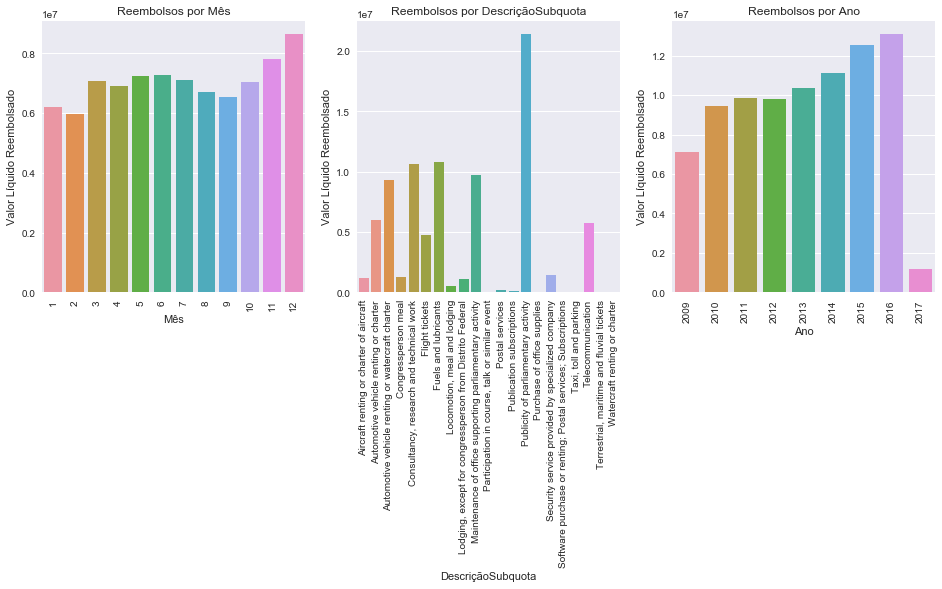

In [204]:
SomaPorColuna(['Mês','DescriçãoSubquota','Ano'], planilha=False)

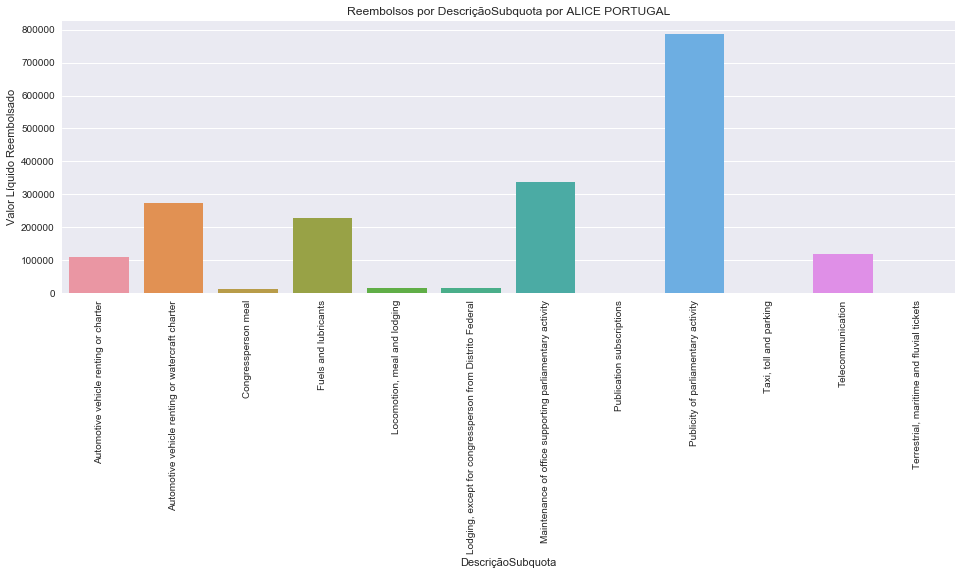

,NomeParlamentar,DescriçãoSubquota,ValorLíquidoReembolso
35,ALICE PORTUGAL,Publicity of parliamentary activity,786931.58
33,ALICE PORTUGAL,Maintenance of office supporting parliamentary...,335893.78
28,ALICE PORTUGAL,Automotive vehicle renting or watercraft charter,273924.00
30,ALICE PORTUGAL,Fuels and lubricants,226912.28
37,ALICE PORTUGAL,Telecommunication,119491.01
27,ALICE PORTUGAL,Automotive vehicle renting or charter,109069.39
31,ALICE PORTUGAL,"Locomotion, meal and lodging",15232.50
32,ALICE PORTUGAL,"Lodging, except for congressperson from Distri...",13532.90
29,ALICE PORTUGAL,Congressperson meal,11579.73
38,ALICE PORTUGAL,"Terrestrial, maritime and fluvial tickets",597.75


In [205]:
SomaPorParlamentar('ALICE PORTUGAL')

ANÁLISE DE DISTRIBUIÇÃO POR CATEGORIA
---


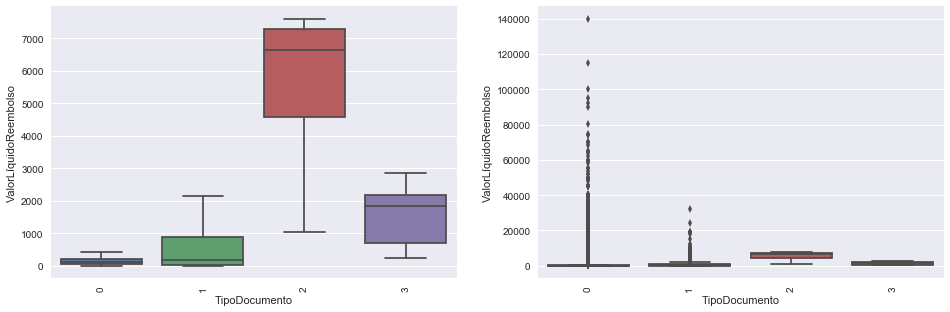

O valor reembolsado para o tipo 0 foi de R$ 74.303 milhões
O valor reembolsado para o tipo 1 foi de R$ 10.182 milhões
O valor reembolsado para o tipo 2 foi de R$ 0.075 milhões
O valor reembolsado para o tipo 3 foi de R$ 0.021 milhões


In [185]:
f , axes = plt.subplots(1,2, figsize = (16,5))
plt.figure(figsize=(16, 6))
documentoReembolso = sns.boxplot(x = dataset.TipoDocumento, y = dataset.ValorLíquidoReembolso, showfliers=False, ax=axes[0])
documentoReembolso2 = sns.boxplot(x = dataset.TipoDocumento, y = dataset.ValorLíquidoReembolso, ax=axes[1])
documentoReembolso.set_xticklabels(rotation=90, labels=dataset.TipoDocumento.cat.categories)
documentoReembolso2.set_xticklabels(rotation=90, labels=dataset.TipoDocumento.cat.categories)
plt.show()

TiposDeDocumento = list(dataset.TipoDocumento.cat.categories)
ReembolsoDocumento = []
for documento in TiposDeDocumento:
    reembolsado = dataset.ValorLíquidoReembolso[dataset.TipoDocumento == documento].sum()/1000000
    ReembolsoDocumento.append(reembolsado)
    print('O valor reembolsado para o tipo {} foi de R$ {} milhões'.format(documento, round(reembolsado,3)))
ReembolsoDocumento = np.array(ReembolsoDocumento)

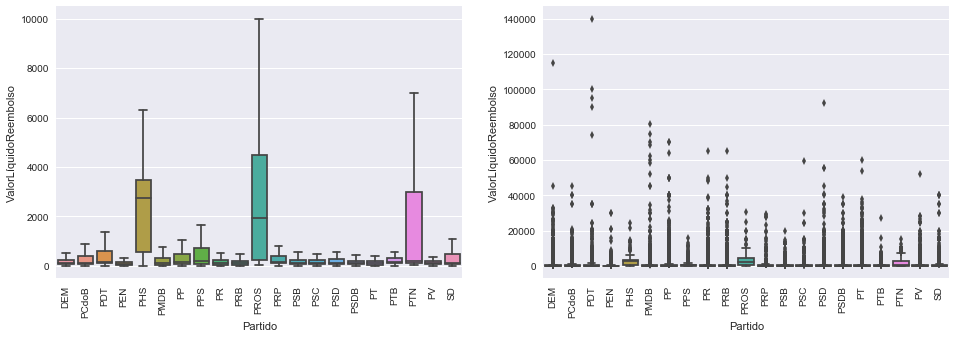

In [14]:
f , axes = plt.subplots(1,2, figsize = (16,5))
vis = sns.boxplot(data=dataset, x='Partido', y='ValorLíquidoReembolso', showfliers=False, ax=axes[0])
vis2 = sns.boxplot(data=dataset, x='Partido', y='ValorLíquidoReembolso', ax=axes[1])
vis.set_xticklabels(rotation=90, labels=dataset.Partido.cat.categories)
vis2.set_xticklabels(rotation=90, labels=dataset.Partido.cat.categories)
plt.show()